In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

tras = pd.read_csv('opcara/Trasmittanza.asc', names=['lambd', 'pc'], sep='\t', decimal='.')
sipm = pd.read_csv('opcara/sipm.asc', names=['lambd', 'pc'], sep='\t', decimal='.')
emi = pd.read_csv('opcara/BGO.asc', names=['lambd', 'pc'], sep='\t', decimal='.')
filtro = pd.read_csv('opcara/Filtro.asc', names=['lambd', 'pc'], sep='\t', decimal='.')

x=np.arange(200,900,1)
f_emi = interp1d(emi.lambd, emi.pc, bounds_error=False, fill_value=0)
f_sipm = interp1d(sipm.lambd, sipm.pc/100, bounds_error=False, fill_value=0)
f_tras = interp1d(tras.lambd, tras.pc/100, bounds_error=False, fill_value=0)
f_filtro = interp1d(filtro.lambd, filtro.pc/100, bounds_error=False, fill_value=0)

#normalizzo spettro di emissione
int_norm = np.trapz(f_emi(x),x)

e= f_emi(x) * 0.0625*0.5 * 7130 * 0.1272 * 8200 / (int_norm*100)

c = (1/x**2)*(10**9) * 0.0625*0.5 * (1/100) * (1- 1/(2.15*0.99)**2)*2*np.pi/137



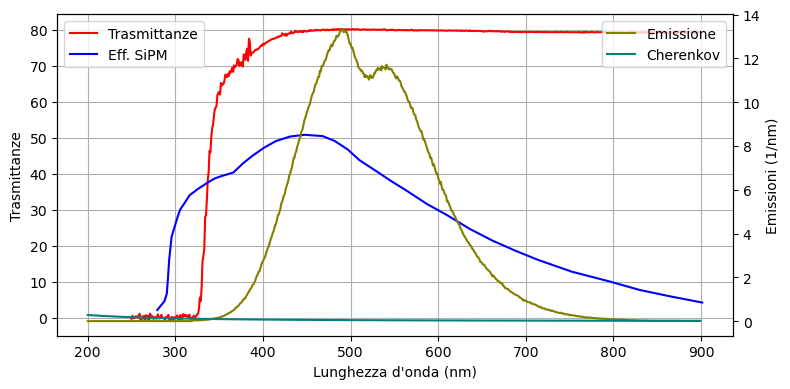

750.5190013345042
5.633888151642444
133.21510493879893


In [3]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax1.set_xlabel("Lunghezza d'onda (nm)")
ax1.set_ylabel('Trasmittanze')
ax1.plot(tras.lambd, tras.pc, color='red')
ax1.plot(sipm.lambd, sipm.pc, color='blue')
ax1.tick_params(axis='y')
ax1.legend(['Trasmittanze', 'Eff. SiPM'],loc=2)
ax2 = ax1.twinx()

ax2.set_ylabel('Emissioni (1/nm)')
ax2.plot(x, e, color='olive')
ax2.tick_params(axis='y')
ax2.plot(x, c, color='teal')
ax1.grid(True)
ax2.legend(["Emissione", "Cherenkov"],loc=1)
plt.savefig('multinofi')
plt.show()

scint = np.trapz(f_tras(x) * f_sipm(x) * e,x)
chere = np.trapz(f_tras(x) * f_sipm(x) * c,x)

print(scint)
print(chere)

print(scint/chere)

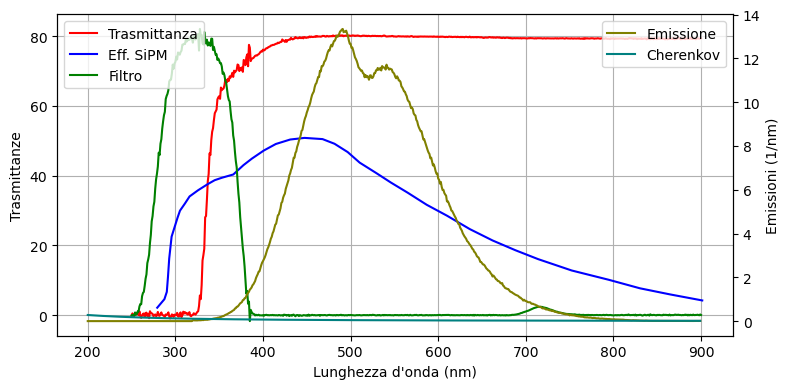

In [4]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()

ax1.set_xlabel("Lunghezza d'onda (nm)")
ax1.set_ylabel('Trasmittanze')
ax1.plot(tras.lambd, tras.pc, color='red')
ax1.plot(sipm.lambd, sipm.pc, color='blue')
ax1.plot(filtro.lambd, filtro.pc, color='green')
ax1.tick_params(axis='y')
ax1.legend(['Trasmittanza', 'Eff. SiPM', 'Filtro'],loc=2)
ax2 = ax1.twinx()

ax2.set_ylabel('Emissioni (1/nm)')
ax2.plot(x, e, color='olive')
ax2.tick_params(axis='y')
ax2.plot(x, c, color='teal')
ax1.grid(True)
ax2.legend(["Emissione", "Cherenkov"],loc=1)
plt.savefig('multifi')
plt.show()

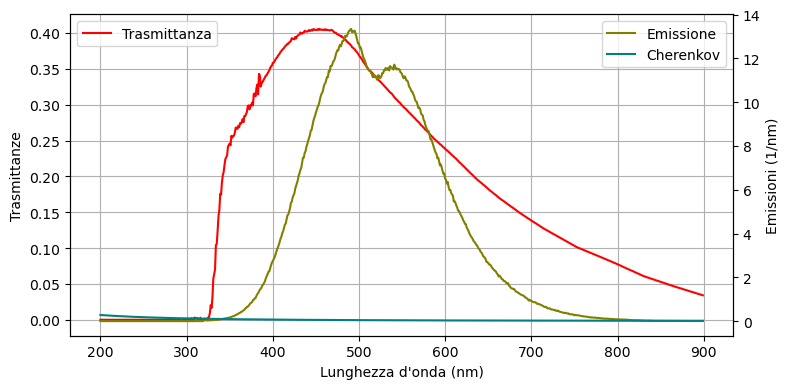

In [6]:
from scipy.interpolate import interp1d
import numpy

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()

ax1.set_xlabel("Lunghezza d'onda (nm)")
ax1.set_ylabel('Trasmittanze')
ax1.plot(x, f_tras(x) * f_sipm(x), color='red')
ax1.tick_params(axis='y')
ax1.legend(['Trasmittanza', 'Eff. SiPM', 'Filtro'],loc=2)
ax2 = ax1.twinx()

ax2.set_ylabel('Emissioni (1/nm)')
ax2.plot(x, e, color='olive')
ax2.tick_params(axis='y')
ax2.plot(x, c, color='teal')
ax1.grid(True)
ax2.legend(["Emissione", "Cherenkov"],loc=1)
plt.show()

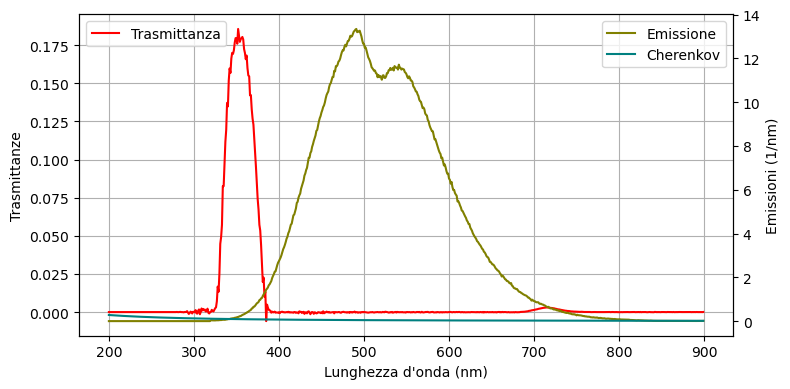

In [7]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()

ax1.set_xlabel("Lunghezza d'onda (nm)")
ax1.set_ylabel('Trasmittanze')
ax1.plot(x, f_tras(x) * f_sipm(x) * f_filtro(x), color='red')
ax1.tick_params(axis='y')
ax1.legend(['Trasmittanza', 'Eff. SiPM', 'Filtro'],loc=2)
ax2 = ax1.twinx()

ax2.set_ylabel('Emissioni (1/nm)')
ax2.plot(x, e, color='olive')
ax2.tick_params(axis='y')
ax2.plot(x, c, color='teal')
ax1.grid(True)
ax2.legend(["Emissione", "Cherenkov"],loc=1)
plt.show()

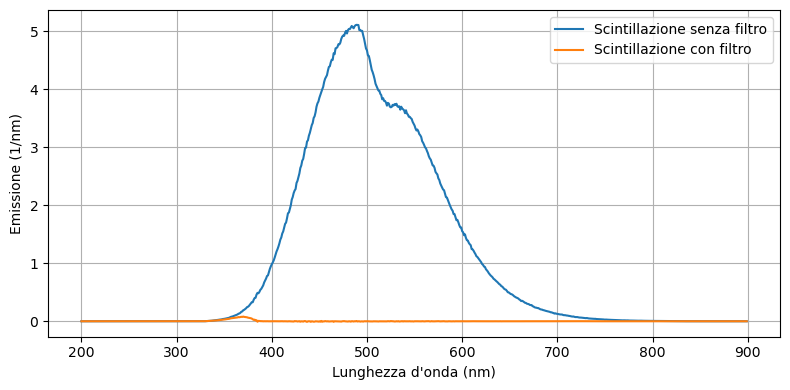

In [8]:


plt.figure(figsize=(8, 4))

plt.plot(x,f_tras(x) * f_sipm(x) * e)
plt.plot(x,f_tras(x) * f_sipm(x) * f_filtro(x) * e)
plt.grid(True)
plt.legend(['Scintillazione senza filtro','Scintillazione con filtro'])
plt.xlabel("Lunghezza d'onda (nm)")
plt.ylabel('Emissione (1/nm)')
plt.savefig('adapteffscint')
plt.show()



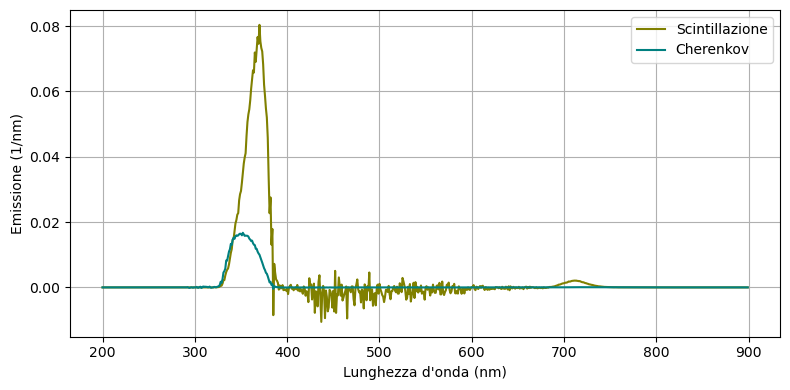

1.9252391129033628
0.600343688259128
3.2068949012958834


In [9]:


plt.figure(figsize=(8, 4))

plt.plot(x,f_tras(x) * f_sipm(x) * f_filtro(x) * e, color ='olive')
plt.plot(x,f_tras(x) * f_sipm(x) * f_filtro(x) * c, color='teal')
plt.grid(True)
plt.legend(['Scintillazione','Cherenkov'])
plt.xlabel("Lunghezza d'onda (nm)")
plt.ylabel('Emissione (1/nm)')
plt.savefig('scitvschere')
plt.show()

scint = np.trapz(f_tras(x) * f_sipm(x) * f_filtro(x) * e,x)
chere = np.trapz(f_tras(x) * f_sipm(x) * f_filtro(x) * c,x)

print(scint)
print(chere)

print(scint/chere)
